#### Importing / Installing packages

In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

### 4. Loading the Raw Data

In [2]:
# Loading the data
raw_data = pd.read_csv('https://raw.githubusercontent.com/Pitsillides91/Python-Tutorials/master/Introduction%20to%20ML%20-%20Linear%20Regression%20Example/Marketing%20Raw%20Data.csv')
 # print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(185, 11)


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,09/11/2020,46.0,34.0,11.0,11.0,2020.0,Monday,707.0,465.0,651.375,No Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Thursday,1726.0,11712.0,1801.750,No Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Friday,2134.0,10000.0,2614.500,No Promo


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             185 non-null    object 
 1   Week             182 non-null    float64
 2   Week_ID          182 non-null    float64
 3   Month            182 non-null    float64
 4   Month_ID         182 non-null    float64
 5   Year             182 non-null    float64
 6   Day_Name         182 non-null    object 
 7   Visitors         182 non-null    float64
 8   Revenue          182 non-null    float64
 9   Marketing Spend  182 non-null    float64
 10  Promo            182 non-null    object 
dtypes: float64(8), object(3)
memory usage: 16.0+ KB


## 5. Data Preprocessing

### 5.1. Exploratory Data Analysis

In [4]:
# Checking for null values

raw_data.isnull().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [5]:
# Visualize the NULL observations


raw_data[raw_data['Week'].isnull()]

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Ways of dealing with missing data
- Delete the whole observation
- Replace the NULL value with another value (mean, rolling mean, last day value, closest day value, mode, median, zero, etc)

In [6]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Week'])

# Printing the shape
raw_data.shape

# Visualize the NULL observations
raw_data.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

In [7]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Date :182
The number of values for feature Week :28
The number of values for feature Week_ID :28
The number of values for feature Month :7 -- [1.000000 2.000000 3.000000 4.000000 5.000000 11.000000 12.000000]
The number of values for feature Month_ID :7 -- [11.000000 12.000000 13.000000 14.000000 15.000000 16.000000 17.000000]
The number of values for feature Year :2 -- [2020.000000 2021.000000]
The number of values for feature Day_Name :7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values for feature Visitors :175
The number of values for feature Revenue :181
The number of values for feature Marketing Spend :182
The number of values for feature Promo :3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


In [8]:
# Visualize the data using seaborn Pairplots

# g = sns.pairplot(raw_data)


In [9]:
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [10]:
# Visualising a Subset of our data - important features

# g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Promo']], hue = 'Promo', height = 5)

In [11]:
raw_data[raw_data['Visitors'] == raw_data['Visitors'].max()]

# df[df['Value']==df['Value'].max()]


,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
59,07/01/2021,2.0,43.0,1.0,13.0,2021.0,Thursday,4139.0,6254.0,3014.6,No Promo


In [12]:
# Visualising a Subset of our data - important features

# g = sns.pairplot(raw_data[['Visitors', 'Revenue', 'Marketing Spend', 'Day_Name']], hue = 'Day_Name', height = 5)

In [13]:
# Visualising a Subset of our data - important features

# g = sns.lmplot(x = 'Marketing Spend', y = 'Revenue', data = raw_data, col = 'Day_Name', col_wrap = 3, height = 5, scatter_kws = {'color':'green'}, ci = False)

In [14]:
# Investigate the distribution of Revenue by Categorical Variables

# pal = ['green', 'blue','red']

# g = sns.boxplot(x = 'Day_Name', y = 'Revenue', data = raw_data, hue = 'Promo', palette = pal)
               
#ax = sns.swarmplot(x = 'Day_Name', y = 'Revenue', data = raw_data, palette = pal, hue = 'Promo')

### 5.2. Data Cleaning

In [15]:
# Deleting outliers

raw_data = raw_data[raw_data['Revenue'] < 27000]

raw_data.shape

(179, 11)

In [16]:
# Column names
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [17]:
# Selecting usefull columns only
raw_data = raw_data[['Day_Name','Visitors', 'Revenue', 'Marketing Spend', 'Promo']]

#visualize the raw data
raw_data.head()

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375,No Promo
1,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750,No Promo
4,Friday,2134.0,10000.0,2614.500,No Promo


In [18]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['Promo', 'Day_Name'])

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

# Visualizing the data
new_raw_data.head()

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


### 5.3. Feature Selection

In this example, we do not have many variables so we should use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time

- 2 ways to help us select the important features are:
    - Correlation 
    - Feature Importance

In [19]:
# Running Correlation

hm = new_raw_data[['Visitors','Revenue','Marketing Spend']].corr()

In [20]:
raw_hm = raw_data.corr()

C:\Users\rwand\AppData\Local\Temp\ipykernel_20020\3843570559.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_hm = raw_data.corr()


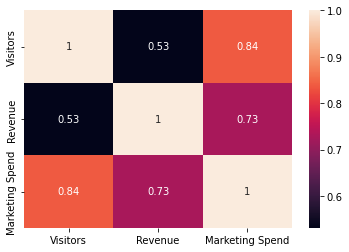

In [21]:
g = sns.heatmap(raw_hm, annot = True)

In [22]:
# Split the data into X & y

X = new_raw_data.drop('Revenue', axis = 1).values
X2 = new_raw_data.drop('Revenue', axis = 1)
y = new_raw_data['Revenue']

print(X.shape)
print(y.shape)

X

(179, 12)
(179,)


array([[707.000000, 651.375000, 1.000000, ..., 0.000000, 0.000000,
        0.000000],
       [1455.000000, 1298.250000, 0.000000, ..., 0.000000, 1.000000,
        0.000000],
       [1520.000000, 1559.375000, 0.000000, ..., 0.000000, 0.000000,
        1.000000],
       ...,
       [2023.000000, 1450.200000, 1.000000, ..., 0.000000, 0.000000,
        0.000000],
       [1483.000000, 1121.875000, 1.000000, ..., 0.000000, 0.000000,
        0.000000],
       [1303.000000, 871.000000, 1.000000, ..., 0.000000, 0.000000,
        0.000000]])

In [23]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'gini', max_depth = 100)
dt.fit(X,y)

# If you want to learn how Decesion Trees work, read here: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

DecisionTreeClassifier(max_depth=100, random_state=15)

#### Notes:
- The importance of a feature is calculated as the (normalized) total reduction of entropy (other criterions too) brought by that feature or the higher information gain
- To understand the maths, read this: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

In [24]:
# Running Feature Importance

for i, column in enumerate(new_raw_data.drop('Revenue', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for Visitors is: 0.420
The feature importance for Marketing Spend is: 0.422
The feature importance for Promo_No Promo is: 0.006
The feature importance for Promo_Promotion Blue is: 0.017
The feature importance for Promo_Promotion Red is: 0.006
The feature importance for Day_Name_Friday is: 0.022
The feature importance for Day_Name_Monday is: 0.023
The feature importance for Day_Name_Saturday is: 0.011
The feature importance for Day_Name_Sunday is: 0.017
The feature importance for Day_Name_Thursday is: 0.017
The feature importance for Day_Name_Tuesday is: 0.017
The feature importance for Day_Name_Wednesday is: 0.023


In [25]:
fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('Revenue', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Visitors is : 0.42025109855618337
The feature importance for Marketing Spend is : 0.4216723842486555
The feature importance for Promo_No Promo is : 0.005707402317571735
The feature importance for Promo_Promotion Blue is : 0.016854990583804144
The feature importance for Promo_Promotion Red is : 0.005618330194601381
The feature importance for Day_Name_Friday is : 0.022473320778405526
The feature importance for Day_Name_Monday is : 0.022585687382297548
The feature importance for Day_Name_Saturday is : 0.01137829896553725
The feature importance for Day_Name_Sunday is : 0.016954137587238276
The feature importance for Day_Name_Thursday is : 0.01698876035034227
The feature importance for Day_Name_Tuesday is : 0.016854990583804144
The feature importance for Day_Name_Wednesday is : 0.022660598451558905


In [26]:
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:]

fi_df

,index,Feature,Feature Importance
0,1,Marketing Spend,0.421672
1,0,Visitors,0.420251
2,11,Day_Name_Wednesday,0.022661
3,6,Day_Name_Monday,0.022586
4,5,Day_Name_Friday,0.022473
5,9,Day_Name_Thursday,0.016989
6,8,Day_Name_Sunday,0.016954
7,3,Promo_Promotion Blue,0.016855
8,10,Day_Name_Tuesday,0.016855
9,7,Day_Name_Saturday,0.011378


## 6. Splitting the Raw Data - Hold-out validation

In [27]:
X = new_raw_data[columns_to_keep].values

print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)

(179, 13)
(179, 12)


In [28]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(143, 12)
(36, 12)
(143,)
(36,)


## 8. Running Linear Regression

In [29]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)
# SK-Learn official doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## 9. Evaluating the Model

In [30]:
# Model Accuracy on training dataset
print('The R2 on the training dataset is: ',r2_score(y_train,y_pred) )   
# Model Accuracy on testing dataset
print('The R2 on the testing dataset is: ', lm.score(X_test, y_test) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

The R2 on the training dataset is:  0.791949990505602
The R2 on the testing dataset is:  0.751190386538668

The RMSE  on the training dataset is:  2618.561282656437
The RMSE  on the testing dataset is:  2340.4200873490113


#### Notes:
    
- The accuracy score represents the coefficient of determination ( 𝑅2 ). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.

- The R Square is measure of how close the data are to the fitted regression line. 

- In this case we can say that our model explains 79% of the training data & 75% of the testing data


- The RMSE is the standard deviation of the residuals. Residuals is the difference between the predicted value and the  regression line. Hence RMSE is a measure of how spread your residuals are.

- The mean absolute error (MAE) is the average of all the absolute errors. The absolute error is the difference between the true value (y_train) and the predicted value (y_pred).

- Coeff are the weights

- The intercept is the expected mean value of Y when all X=0

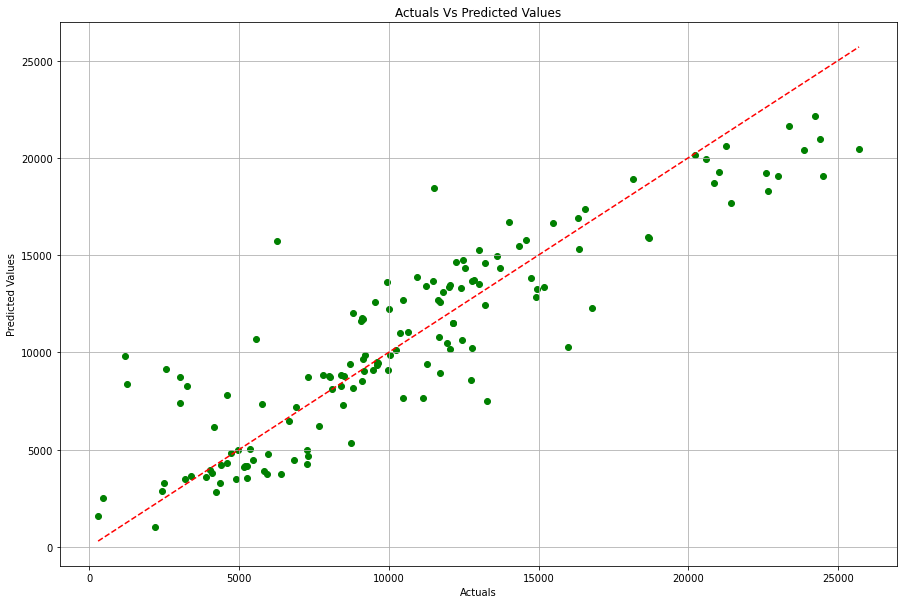

In [31]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
plt.grid()

# increase size



C:\Users\rwand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


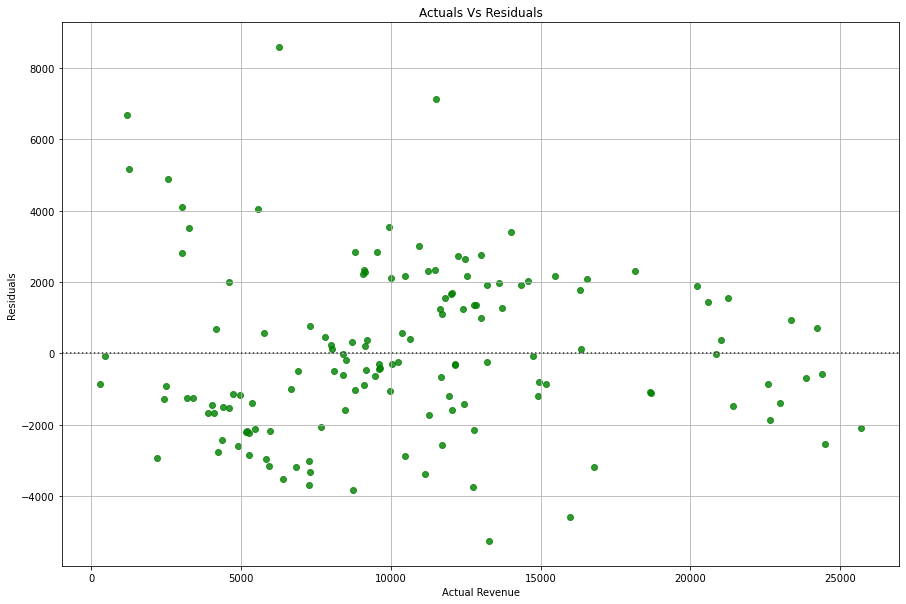

In [32]:
# # Ploting Residuals

plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')
plt.grid()



In [33]:
X2.columns

Index(['Visitors', 'Marketing Spend', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],
      dtype='object')

##### The next step should be to go back, remove more outliers and check if our model can be improved

## 10. How to use our L. Regression model to Make Predictions

In [34]:
# Passing Coeff into a table

Coeff = lm.coef_
Coeff.shape

# Reshaping
Coeff = Coeff.reshape(-1,12)


# Creating a Dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns])

# Displaying 
Coeff_df


,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,3.695615,0.972169,-292.494076,-352.308895,738.005738,814.821481,-155.867567,3724.69059,150.084913,-902.241594,-4295.87654,571.185949


In [35]:
# Making Predictions                        

# Variables

Day = 'Day_Name_Friday'
Visitors = 8000
Marketing_Spend = 5000
Promo = 'Promo_Promotion Red'

# Regression Formula for pred
# y = a + bx + ..   # Where y = price, a = intercept,  b = no. of Visitors and x = coefficient of engine size

# Prediction Calculator
pred1 = (lm.intercept_) + (Coeff_df[Day].values[0] * 1) + (Coeff_df['Visitors'].values[0] * Visitors) + (Coeff_df['Marketing Spend'].values[0] * Marketing_Spend) + (Coeff_df[Promo].values[0] * 1)

print('The predicted Revenue is: ', pred1)




The predicted Revenue is:  [40039.240689]


In [36]:
######################## Where we can apply this as a business and how? #######################################


# 1. We can create a prediction tool for upcoming marketing campaigns 

# 2. We can analyse past marketing campaigns and suggest what work, what did not work, 
# how much money we could have made and suggest changes - campaign optimisation

# 3. We can predict the potential of Stores or Accounts or Channels or Campaigns and compare that with what they actually achieving.
# Then we can grade them and make suggestions (over achieving vs underachieving Vs potential Accounts)

# 4. We can deploy the model in a server/cloud and automatically adjusting the campaigns that generate the most money depending on the day.
# At the same time, keep running A/B testing with new campaigns (ideas) and re-adjust if needed